# Demo using np.fft.fft to calculate power spectrum

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size

Frequency array same length as time-series.

len(frq) =  2000


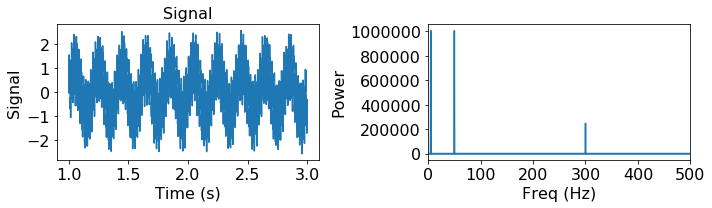

In [2]:
dt = .001  # timestep size
fs = 1/dt  # sampling freq
t = np.arange(1, 3, dt)  # time vector
# noisy signal
x = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*50*t) + .5*np.sin(2*np.pi*300*t) + np.random.normal(0, .1, len(t))

n = len(x)
fft = np.fft.fft(x, n)
psd = np.abs(fft)**2
frq = np.fft.fftfreq(n, dt)

print('len(frq) = ', len(frq))

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
axs[0].plot(t, x)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal')
axs[0].set_title('Signal')

axs[1].plot(frq, psd)
axs[1].set_xlim(0, fs/2)
axs[1].set_xlabel('Freq (Hz)')
axs[1].set_ylabel('Power')

for ax in axs:
    set_font_size(ax, 16)

Frequency array longer than time-series

len(frq) =  2400


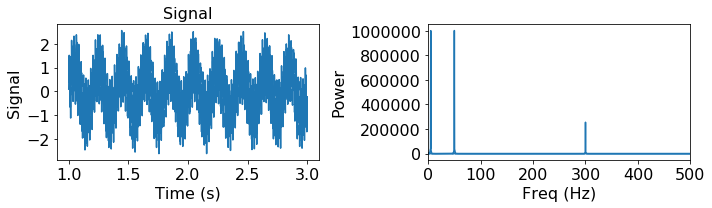

In [3]:
# n > len(t)
dt = .001
fs = 1/dt
t = np.arange(1, 3, dt)
x = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*50*t) + .5*np.sin(2*np.pi*300*t) + np.random.normal(0, .1, len(t))

n = int(np.round(1.2*len(x)))

fft = np.fft.fft(x, n)
psd = np.abs(fft)**2
frq = np.fft.fftfreq(n, dt)

print('len(frq) = ', len(frq))

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
axs[0].plot(t, x)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal')
axs[0].set_title('Signal')

axs[1].plot(frq, psd)
axs[1].set_xlim(0, fs/2)
axs[1].set_xlabel('Freq (Hz)')
axs[1].set_ylabel('Power')

for ax in axs:
    set_font_size(ax, 16)

# Power spectral density and autocorrelation of random process

In [4]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size


def cor_psd(x, y, dt):
    '''
    Return (cross/auto) correlation and (cross/auto) power spectral density estimated
    from a set of signals.
    Each row of x or y is a trial.
    '''
    frq = np.fft.fftfreq(x.shape[1], dt) % (1/dt)
    
    fft_x = np.fft.fft(x, axis=1)
    fft_y = np.fft.fft(y, axis=1)
    psd = np.mean(np.abs(fft_x * np.conj(fft_y)), axis=0)
    
    cor = np.real(np.fft.ifft(psd))
    
    return cor, psd, frq

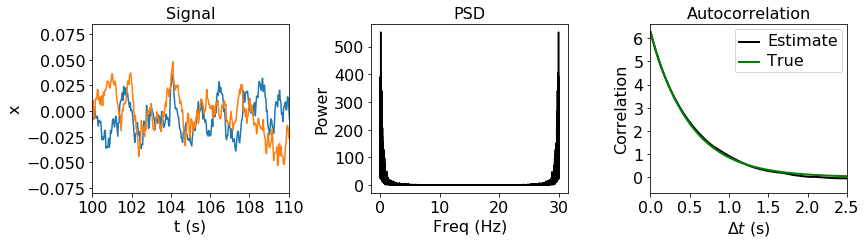

In [5]:
# test cor_psd func
np.random.seed(0)
FPS = 30.
DT = 1/FPS

t = np.arange(0, 600, DT)
xs = np.nan * np.zeros((3, len(t)))
tau = .5

for ctr in range(3):
    xs[ctr, 0] = 0
    for ct, _t in enumerate(t[1:], 1):
        dx = (DT/tau) * (-xs[ctr, ct-1] + .1 * np.random.randn())
        xs[ctr, ct] = xs[ctr, ct-1] + dx
    
acor, psd, frq = cor_psd(xs, xs, DT)


# ground truth autocorr
acor_true = acor.max() * np.exp(-t/tau)

fig, axs = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)
axs[0].plot(t, xs[0, :])
axs[0].plot(t, xs[1, :])
axs[0].set_xlim(100, 110)
axs[0].set_xlabel('t (s)')
axs[0].set_ylabel('x')
axs[0].set_title('Signal')

axs[1].plot(frq, psd, c='k')
axs[1].set_xlabel('Freq (Hz)')
axs[1].set_ylabel('Power')
axs[1].set_title('PSD')

axs[2].plot(t, acor, lw=2, c='k')
axs[2].plot(t, acor_true, lw=2, c='g')
axs[2].set_xlim(0, 5*tau)
axs[2].set_xlabel('$\Delta t$ (s)')
axs[2].set_ylabel('Correlation')
axs[2].set_title('Autocorrelation')
axs[2].legend(['Estimate', 'True'])

for ax in axs:
    set_font_size(ax, 16)